In [22]:
from lightgbm import LGBMClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
eval_set = [(X_train, y_train),
            (X_test, y_test)]
lgb = LGBMClassifier(n_jobs=-1)

# Evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and logloss for classification, mean average precision for ranking)
# eval_metric可选参数
# 可自定义
'''
l1:absolute loss
l2:square loss
rmse:root square loss
cross_entropy
multi_error:error rate for multi-class classification
multi_logloss:log loss for multi-class classification
binary_logloss
auc
'''
lgb.fit(X_train, y_train,
        early_stopping_rounds=20,  # ==>xgboost
        verbose=5,  # ==>xgboost
        eval_set=eval_set,   # ==>xgboost
        eval_metric=['multi_error', 'multi_logloss']  # ==>xgboost
        )


result = lgb.predict(X_test)
result

Training until validation scores don't improve for 20 rounds
[5]	training's multi_error: 0.125333	training's multi_logloss: 0.800118	valid_1's multi_error: 0.194667	valid_1's multi_logloss: 0.917391
[10]	training's multi_error: 0.0831111	training's multi_logloss: 0.494943	valid_1's multi_error: 0.189333	valid_1's multi_logloss: 0.662967
[15]	training's multi_error: 0.0555556	training's multi_logloss: 0.336482	valid_1's multi_error: 0.184	valid_1's multi_logloss: 0.54485
[20]	training's multi_error: 0.0346667	training's multi_logloss: 0.240332	valid_1's multi_error: 0.169333	valid_1's multi_logloss: 0.481145
[25]	training's multi_error: 0.0226667	training's multi_logloss: 0.176907	valid_1's multi_error: 0.161333	valid_1's multi_logloss: 0.446316
[30]	training's multi_error: 0.0115556	training's multi_logloss: 0.133546	valid_1's multi_error: 0.16	valid_1's multi_logloss: 0.428637
[35]	training's multi_error: 0.00488889	training's multi_logloss: 0.10334	valid_1's multi_error: 0.158667	val

array([3, 2, 6, 4, 7, 7, 5, 5, 6, 2, 7, 2, 5, 5, 3, 7, 2, 2, 1, 3, 2, 5,
       5, 6, 3, 1, 5, 4, 6, 2, 3, 7, 2, 2, 5, 2, 5, 2, 5, 7, 2, 2, 2, 2,
       1, 1, 5, 5, 2, 5, 1, 3, 2, 1, 5, 2, 3, 1, 5, 5, 6, 1, 2, 5, 3, 6,
       5, 5, 3, 5, 2, 2, 4, 1, 3, 5, 1, 1, 5, 2, 2, 1, 6, 1, 5, 6, 7, 1,
       5, 4, 6, 4, 5, 5, 2, 3, 5, 3, 1, 4, 6, 6, 2, 5, 2, 1, 5, 1, 2, 5,
       3, 3, 5, 5, 2, 5, 2, 2, 7, 1, 1, 2, 5, 7, 5, 4, 5, 6, 6, 5, 4, 1,
       5, 2, 7, 2, 1, 6, 2, 6, 2, 2, 2, 7, 6, 1, 2, 2, 2, 2, 5, 2, 5, 3,
       5, 5, 2, 2, 5, 1, 7, 5, 3, 2, 2, 6, 7, 6, 1, 5, 5, 1, 5, 5, 6, 6,
       2, 6, 2, 5, 1, 2, 2, 5, 1, 3, 7, 1, 2, 4, 2, 1, 1, 2, 2, 5, 2, 2,
       2, 6, 5, 2, 3, 3, 5, 3, 6, 2, 2, 2, 2, 1, 2, 7, 1, 2, 6, 5, 5, 5,
       3, 5, 2, 6, 3, 5, 5, 2, 6, 3, 2, 5, 6, 2, 6, 2, 2, 2, 3, 2, 1, 5,
       6, 6, 1, 6, 1, 1, 2, 5, 2, 1, 1, 6, 1, 1, 5, 2, 5, 5, 5, 1, 6, 5,
       5, 2, 7, 5, 2, 2, 2, 2, 1, 1, 1, 2, 3, 5, 2, 2, 2, 1, 6, 6, 2, 1,
       2, 1, 7, 5, 7, 5, 1, 3, 2, 2, 2, 4, 1, 5, 3,

In [25]:
result.shape

(750,)

In [26]:
# 预测结果可以输出为概率向量
result_pro = lgb.predict_proba(X_test) # 仅分类算法
result_pro

array([[1.01969133e-03, 5.15288180e-03, 9.66871291e-01, ...,
        1.37544755e-03, 2.48776406e-02, 2.87016199e-04],
       [1.44737370e-02, 9.78538345e-01, 9.73084977e-04, ...,
        3.92315299e-03, 1.07231768e-03, 5.31865024e-04],
       [7.69339196e-02, 3.72099503e-01, 3.35230208e-03, ...,
        1.78299322e-02, 5.26256311e-01, 1.84209029e-03],
       ...,
       [7.99119280e-03, 1.31896665e-02, 4.69261956e-01, ...,
        1.07792096e-02, 3.94935282e-01, 2.25198296e-03],
       [2.97662481e-03, 4.91299479e-03, 1.41675179e-01, ...,
        4.01512810e-03, 8.44858812e-01, 8.38075781e-04],
       [7.70392240e-04, 2.04469359e-02, 3.70816480e-04, ...,
        9.77616324e-01, 4.08762188e-04, 2.01920248e-04]])

In [27]:
result_pro.shape

(750, 7)

In [28]:
lgb.score(X_test, y_test)  # 精度

0.848

In [29]:
lgb.feature_importances_  # 特征的相对重要性

array([1421,  674,  378,  692,  564, 1258,  606,  512,  569, 1291,  105,
          0,   15,   68,   61,   15,    0,    0,    6,    0,    0,    0,
          0,   29,    0,  131,   21,    0,    0,    0,   20,   15,    6,
         70,    0,    7,   55,    5,    0,    0,    0,    0,   48,   93,
          0,    0,   13,    0,    0,    0,    0,   14,    5,    0])

In [30]:
evals_result = lgb.evals_result_  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'training': OrderedDict([('multi_error',
               [0.42844444444444446,
                0.24,
                0.16444444444444445,
                0.14177777777777778,
                0.12533333333333332,
                0.12088888888888889,
                0.11022222222222222,
                0.09866666666666667,
                0.088,
                0.08311111111111111,
                0.07644444444444444,
                0.06933333333333333,
                0.06577777777777778,
                0.059555555555555556,
                0.05555555555555555,
                0.051111111111111114,
                0.04622222222222222,
                0.042222222222222223,
                0.03866666666666667,
                0.034666666666666665,
                0.033777777777777775,
                0.030222222222222223,
                0.027555555555555555,
                0.024444444444444446,
                0.02266666666666667,
                0.021333333333333333,
                

In [31]:
train_evals = evals_result['training']['multi_logloss']
test_evals = evals_result['valid_1']['multi_logloss']

Text(0.5, 0, 'rounds')

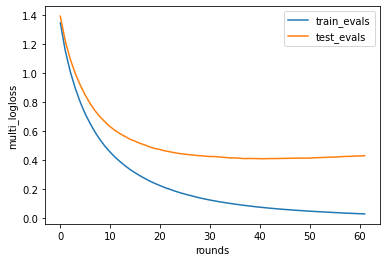

In [32]:
plt.plot(train_evals, label='train_evals')
plt.plot(test_evals, label='test_evals')
plt.legend()
plt.ylabel('multi_logloss')
plt.xlabel('rounds')